### Nama : M Al Insyirah Satria H --- Nim : 09011381823083

## Prediksi Retensi Nasabah di Perbankan Sektor menggunakan Artificial Neural Network

### Artificial Neural Network

Artificial Neural Network atau jaringan saraf tiruan adalah system komputasi dimana arsitektur dan komputasi diilhami dari pengetahuan tentang sel saraf dalam otak. ANN merupakan model yang meniru cara kerja jaringan neural biologis. Dengan melakukan proses belajar jaringan saraf tiruan dapat mengatur dirinya untuk menghasilkan suatu respon yang konsisten terhadap rangkaian masukkan. Jaringan saraf tiruan dirancang dan dilatih untuk memiliki kemampuan seperti manusia.

#### Tujuan 

Tujuannya adalah menyajikan analisis perdition dan akurasi risiko retensi nasabah di sektor perbankan. Jaringan saraf adalah model pembelajaran yang terinspirasi oleh neuron biologis yang digunakan untuk memperkirakan dan memprediksi yang dapat bergantung pada sejumlah besar input. Dataset Churn Modelling, digunakan untuk metode analisis data untuk mengekstrak kumpulan data informatif dari volume besar set data. Data pelatihan ini dicek silang dengan data uji. Ini berfokus pada prediksi di pelanggan dengan menggunakan algoritma Artificial neural network (ANN).

Dalam Tugas ini saya memakai Library sebagai berikut :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Numpy : sebagai library untuk memproses larik
2. Matplotlib : sebuah library untuk membuat plot atau visualisasi data dalam 2 dimensi
3. Pandas : library favorit yang dipakai untuk analisis dan manipulasi data


library selanjutnya di import di bawah

4. Keras : pustaka sumber terbuka yang menyediakan antarmuka Python untuk jaringan saraf tiruan.
5. Scikit Learn  : library yang menyediakan banyak pilihan algoritma machine learning yang dapat langsung dipakai seperti klasifikasi, regresi, clustering, dimensionality reduction, dan pemrosesan data. Selain itu Scikit Learn juga dapat dipakai untuk analisis data.

### Program

#### Import Dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

#### Mengkodekan data kategorikal dengan Scikit Learn

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

#### Splitting dataset Menjadi Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Importing the Keras libraries and packages

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


https://c.mql5.com/18/20/NN1__1.gif

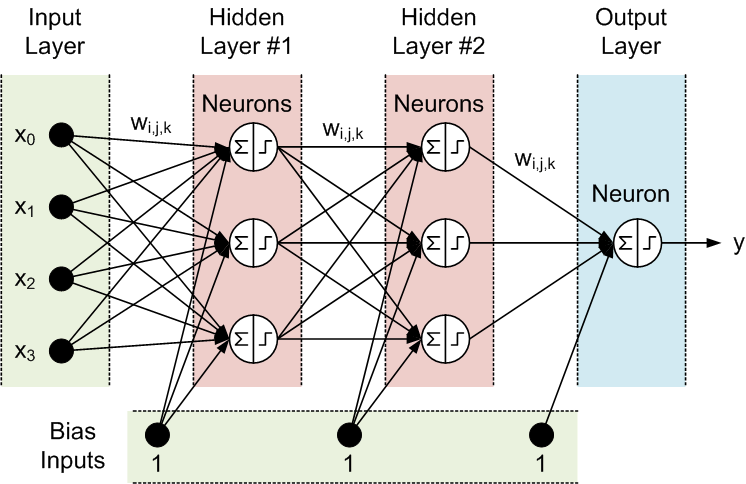

Gambar diatas merupakan visualisasi Artificial Neural Network yang terdapat di program saya, di dalamnya terdapat input, dua hidden layer dan output.

In [10]:
##### Initialising the ANN
classifier = Sequential()

# Menambahkan input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Menambahkan second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Menambahkan the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  """
C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4842 - accuracy: 0.7954
Epoch 2/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4305 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - ETA: 0s - loss: 0.4267 - accuracy: 0.79 - 1s 82us/step - loss: 0.4249 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4202 - accuracy: 0.8145
Epoch 5/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.4172 - accuracy: 0.8254
Epoch 6/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.4152 - accuracy: 0.8300
Epoch 7/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4143 - accuracy: 0.8295 0s - loss: 0.4107 - accuracy: 0.
Epoch 8/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4127 - accuracy: 0.8303
Epoch 9/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4116 - accur

array([[1540,   55],
       [ 260,  145]], dtype=int64)

#### Membuat prediksi dan mengevaluasi hasil

##### Memprediksi hasil set test

Disini saya menggunakan confusion matrix untuk memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya, Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui. berikut adalah gambarnya

https://miro.medium.com/max/700/1*IzN36IDL95ASZcV7g_KRUg.jpeg
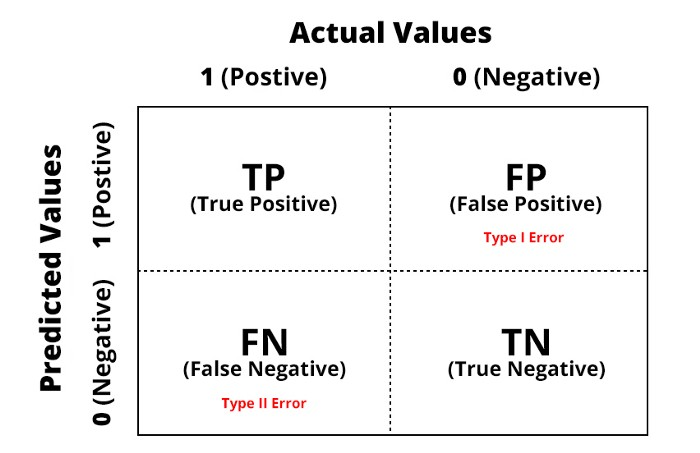

Artinya :
1. True Positive (TP) : Merupakan data positif yang diprediksi benar
2. True Negative (TN) : Merupakan data negatif yang diprediksi benar
3. False Postive (FP) — Type I Error : Merupakan data negatif namun diprediksi sebagai data positif
4. False Negative (FN) — Type II Error : Merupakan data positif namun diprediksi sebagai data negatif.

##### evaluasi hasil

In [11]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
t=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)



array([[1540,   55],
       [ 260,  145]], dtype=int64)

In [12]:
#Show the Accuracy Score
accuracy_score(y_test, y_pred)

0.8425

#### Kesimpulan

Bisa dilihat Output diatas, saya mendapatkan array matrix dengan nilai True Positive 1540, nilai True Negative 145, nilai False Positive 55, dan nilai False Negative 260, itu menandakan bahwa nilai prediksinya sebagian besar benar dan ke akurasiannya tinggi yaitu 84% dalam hal prediksi retensi nasabah di sektor perbankan ini.

Sumber : https://github.com/Sivakoti-challa/Prediction-of-Customer-retention-in-Banking-Sector-using-Artificial-Neural-Network